# Problem Statement

#### Predict whether income exceeds $50K/yr based on census data. Also known as the "Census Income" dataset

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [367]:
data = pd.read_csv("adult.csv")

In [368]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [369]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [370]:
data.shape

(32561, 15)

In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
country           32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Cleaning

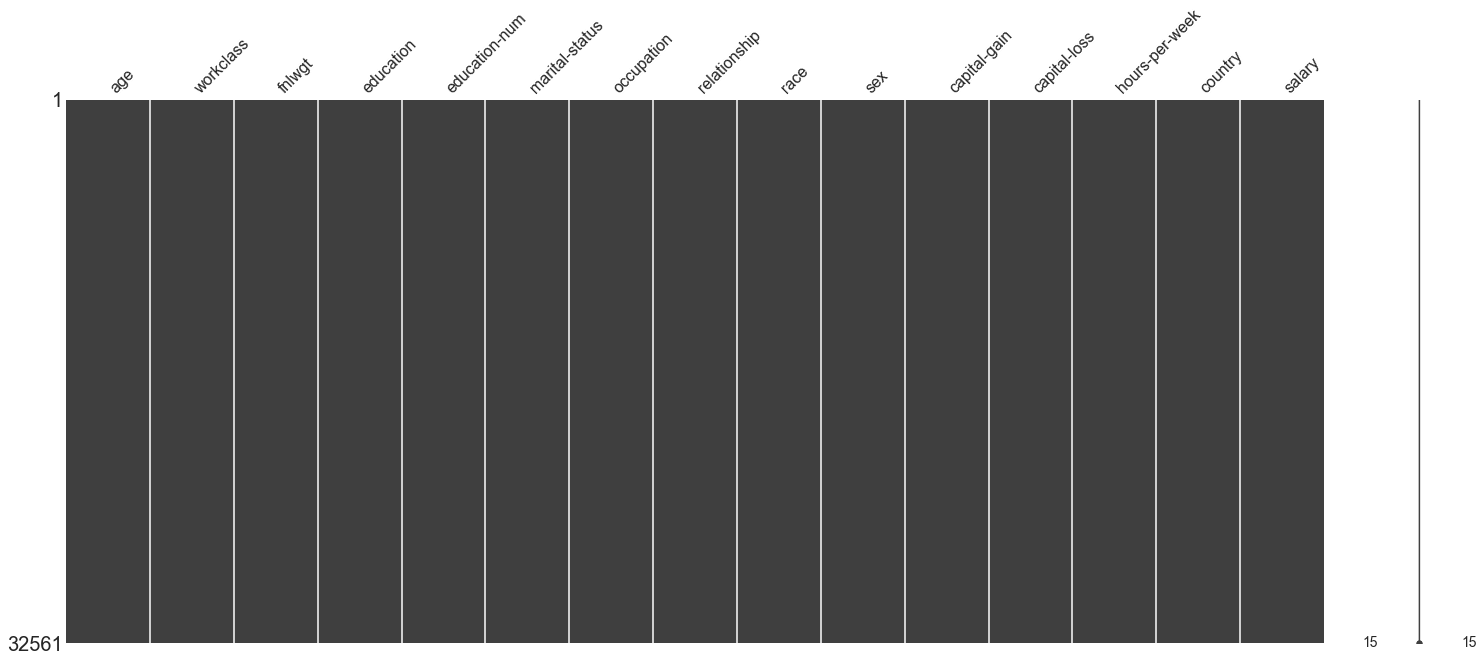

In [372]:
ms.matrix(data)

In [373]:
data.isnull().values.any()

False

In [374]:
data['workclass'].unique()


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [375]:
def impute_num(cols):
    val = cols[0]

    if val>0 or val<=0:
        return val
    else:
        return np.nan

In [376]:
num_cols=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [377]:
for i in num_cols:
    data[i] = data[[i]].apply(impute_num,axis=1)

In [378]:
def impute_cat(cols):
    val = cols[0]

    if '?' not in val:
        return val
    else:
        return np.nan


In [379]:
cat_cols = [i for i in data.columns if i not in num_cols]

In [380]:
for i in cat_cols:
    data[i] = data[[i]].apply(impute_cat,axis=1)

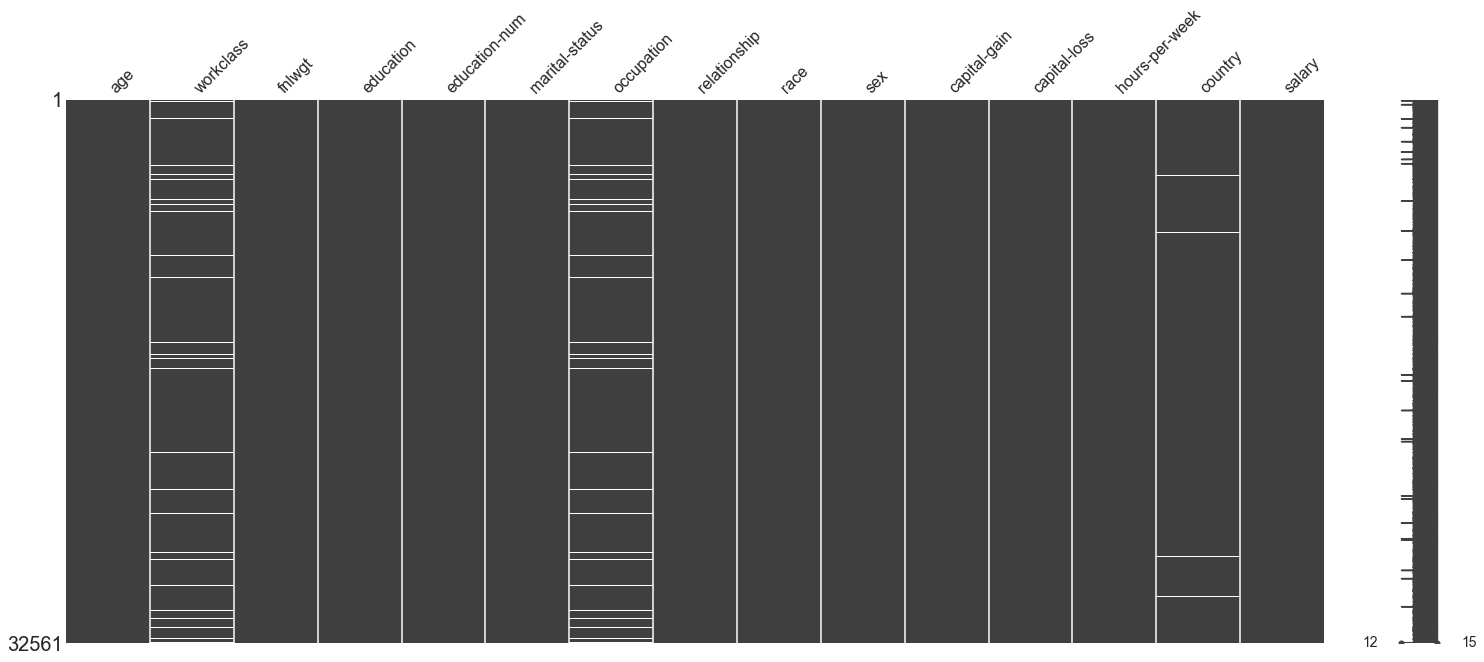

In [381]:
ms.matrix(data)


In [382]:
len(data[data['workclass'].isna()])

1836

In [383]:
data[data['workclass'].isna()]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [384]:
data['workclass'].fillna("unknown_wc",inplace=True)


In [385]:
data['occupation'].fillna("unknown_occ",inplace=True)


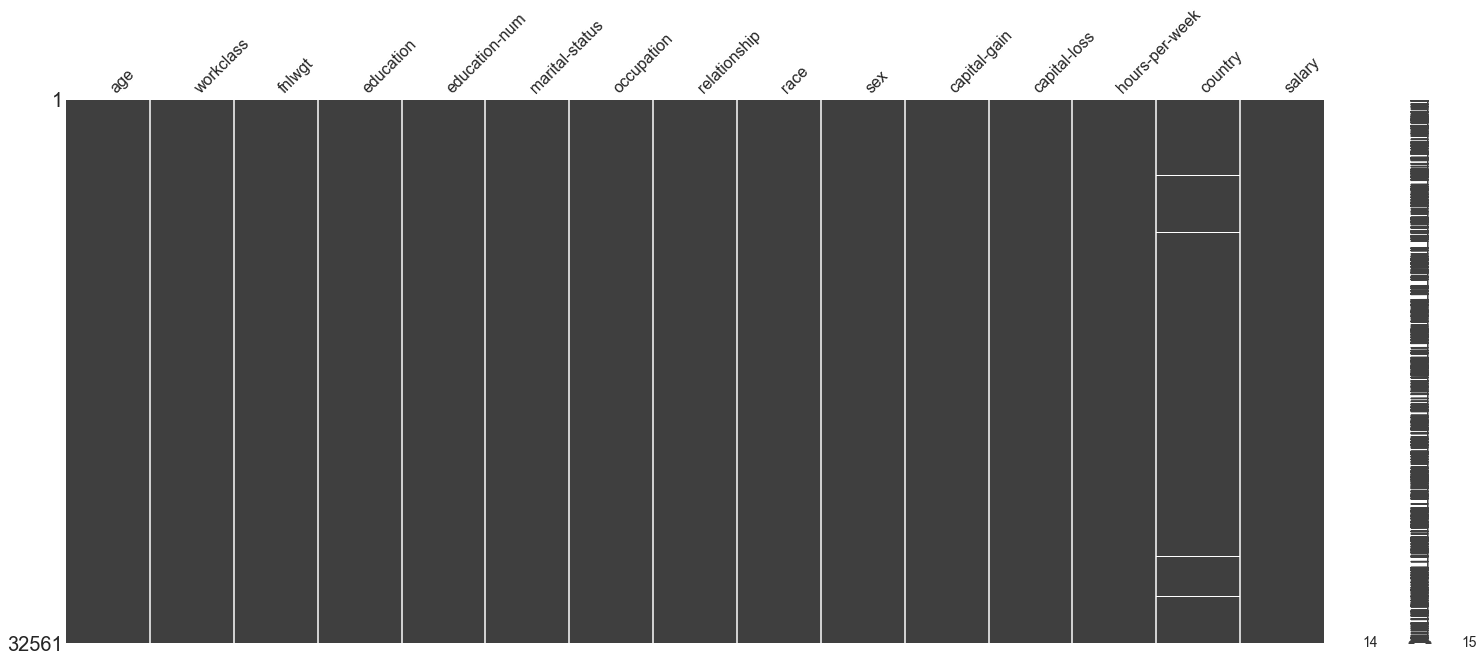

In [386]:
ms.matrix(data)

In [387]:
data['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [388]:
data['country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [389]:
data['country'].fillna(' United-States',inplace=True)

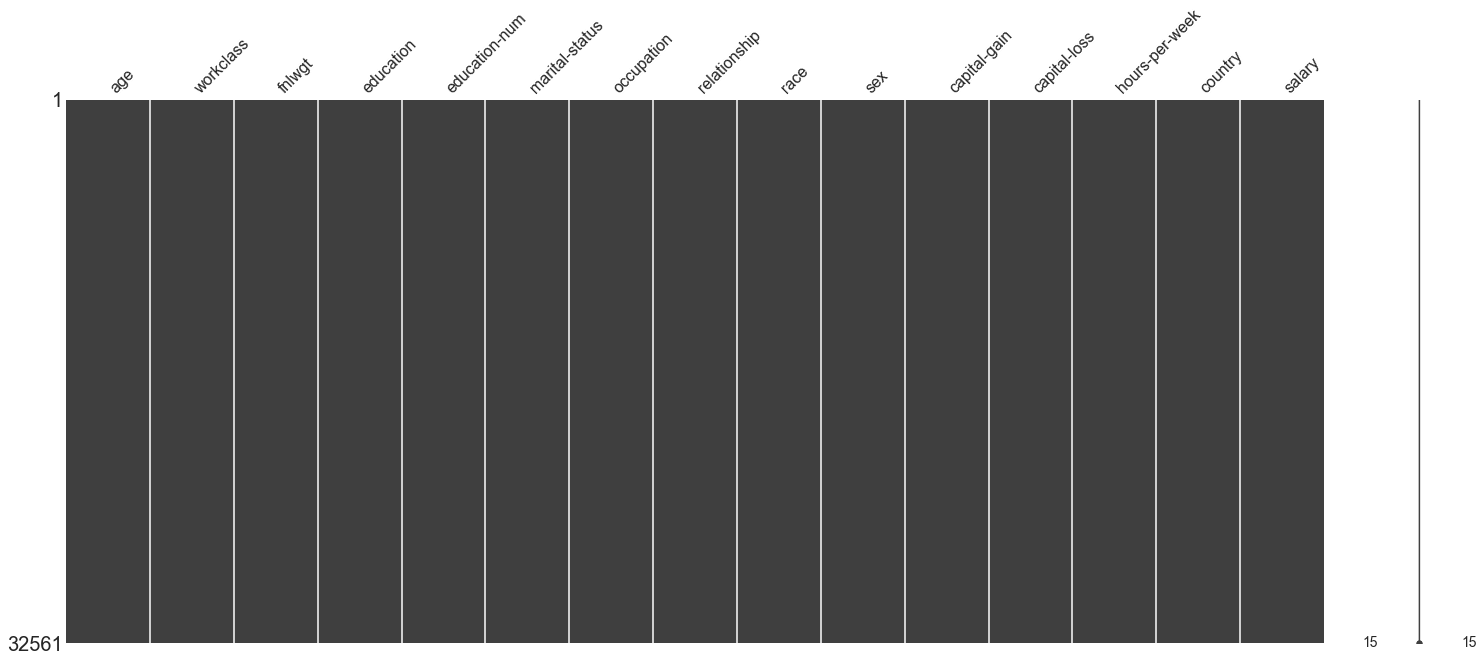

In [390]:
ms.matrix(data)

In [391]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [392]:
def impute_sal(cols):
    val = cols[0]

    if val == ' <=50K':
        return 0
    else:
        return 1


In [393]:
data['salary'] = data[['salary']].apply(impute_sal,axis=1)

In [394]:
data['salary'].unique()

array([0, 1], dtype=int64)

In [396]:
data.to_csv("cleaned_data.csv",index=False)

In [339]:
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
salary,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


In [340]:
for x in cat_cols:
    print(x ,':', len(data[x].unique()))

workclass : 9
education : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
country : 41
salary : 2


In [341]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(
    steps=[
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)


In [342]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline(
    steps=[
           ("scale", StandardScaler())]
)


In [343]:
cat_cols = data.select_dtypes(exclude="number").columns
num_cols = data.select_dtypes(include="number").columns


In [344]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country'],
      dtype='object')

In [357]:
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
            'hours-per-week']


In [358]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [359]:
X_processed = full_processor.fit_transform(data)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    data['salary'].values.reshape(-1, 1)
)

In [360]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=1121218
)


In [363]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [362]:
from sklearn.metrics import accuracy_score,confusion_matrix
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train,verbose=2)


preds = xgb_cl.predict(X_test)

accuracy_score(y_test, preds)

c:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8656184743888957

In [364]:

cf_matrix = confusion_matrix(y_test, preds)

print(cf_matrix)


[[5879  302]
 [ 792 1168]]
